In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import nltk
import nltk as nlp
import string
import re
import pickle

In [3]:
df = pd.read_csv('DerSpiegel-utf-8.csv', encoding="utf-8")

df = df[['title', 'summary', 'category']].astype(str)
df.drop_duplicates(keep=False, inplace=True)
df.dropna(inplace=True)
df = df.reindex(range(0,len(df)))

df['text'] = df['title'] + " " + df['summary']


df['category_id'] = df['category'].factorize()[0]
# df.category_id.dropna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68048 entries, 0 to 68047
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        68048 non-null  object
 1   summary      68048 non-null  object
 2   category     68048 non-null  object
 3   text         68048 non-null  object
 4   category_id  68048 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.6+ MB


In [14]:
df[::5000]

,title,summary,category,text,category_id
0,Der verrohte Kontinent,Griechische Grenzschützer haben aller Wahrsche...,politik,Der verrohte Kontinent Griechische Grenzschütz...,0
5000,Warnung ohne Namen,"""A Warning"", eine Warnung: So heißt das jüngst...",politik,"Warnung ohne Namen ""A Warning"", eine Warnung: ...",0
10000,Alle Bundesländer führen Maskenpflicht ein,"Die Bundesländer sind sich einig, alle schreib...",panorama,Alle Bundesländer führen Maskenpflicht ein Die...,1
15000,Frauchen verliert Trennungsstreit um gemeinsam...,"Ein Paar lässt sich scheiden, die gemeinsamen ...",panorama,Frauchen verliert Trennungsstreit um gemeinsam...,1
20000,Manchester City legt Berufung gegen Europapoka...,Der internationale Sportgerichtshof hat den Ei...,sport,Manchester City legt Berufung gegen Europapoka...,2
25000,Eine Karriere wie ein Slalomrennen,Felix Neureuther tritt als bester deutscher Sk...,sport,Eine Karriere wie ein Slalomrennen Felix Neure...,2
30000,SPD will Vorstandsgehälter deckeln,Mit einem Rettungsfonds soll der Bund bei klam...,wirtschaft,SPD will Vorstandsgehälter deckeln Mit einem R...,3
35000,TÜV Süd warnt vor weiteren Dammbrüchen,Nach der tödlichen Schlammlawine im brasiliani...,wirtschaft,TÜV Süd warnt vor weiteren Dammbrüchen Nach de...,3
40000,Facebook blendet Likes aus,Der Wettkampf um Likes soll eingedämmt werden:...,netzwelt,Facebook blendet Likes aus Der Wettkampf um Li...,4
45000,Wenn der Delfin das iPad mopst,Im Sommerloch ist nichts los? Stimmt nicht gan...,netzwelt,Wenn der Delfin das iPad mopst Im Sommerloch i...,4


In [4]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['category_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =100)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

# Logistic Regression Classifier

In [6]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression(max_iter=1000))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

C:\Users\amr.khalil\AppData\Local\Continuum\miniconda3\envs\gpu\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy: 82.04%


In [10]:
# save the model to disk
filename = 'LogisticRegressionModel.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8203526818515797


In [11]:
print(confusion_matrix(y_test, prediction))

[[1491  136    6  116   25   89   53]
 [ 107 1441   23   75   43  107  126]
 [  13   35 1822   25   11   27   31]
 [ 128   62    7 1565   54   79   44]
 [  42   61   14   66 1647   52   78]
 [  72   93    8   85   46 1567   69]
 [  62  112   14   37   43   69 1632]]


In [12]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1916
           1       0.74      0.75      0.75      1922
           2       0.96      0.93      0.94      1964
           3       0.79      0.81      0.80      1939
           4       0.88      0.84      0.86      1960
           5       0.79      0.81      0.80      1940
           6       0.80      0.83      0.82      1969

    accuracy                           0.82     13610
   macro avg       0.82      0.82      0.82     13610
weighted avg       0.82      0.82      0.82     13610



# Support Vector Classifier

In [167]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

# save the model to disk
filename = 'LinearSVC.sav'
pickle.dump(model, open(filename, 'wb'))

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy: 14.34%
[[260 284 264 302 275 267 264]
 [241 279 287 303 246 288 278]
 [280 292 295 288 264 292 253]
 [243 281 258 313 272 278 294]
 [274 298 296 261 276 288 267]
 [264 296 289 253 265 279 294]
 [259 317 292 297 265 289 250]]
              precision    recall  f1-score   support

           0       0.14      0.14      0.14      1916
           1       0.14      0.15      0.14      1922
           2       0.15      0.15      0.15      1964
           3       0.16      0.16      0.16      1939
           4       0.15      0.14      0.14      1960
           5       0.14      0.14      0.14      1940
           6       0.13      0.13      0.13      1969

    accuracy                           0.14     13610
   macro avg       0.14      0.14      0.14     13610
weighted avg       0.14      0.14      0.14     13610



In [186]:
id_to_category = {0:'politik', 1:'panorama', 2:'sport', 3:'wirtschaft',
           4:'netzwelt', 5:'wissenschaft', 6:'kultur'}

to_predict = ["nobel"]
pred = model.predict(to_predict)
classes = [id_to_category[i] for i in pred]
classes

['politik']

# Multinomial Naive Bayes Classifier

In [18]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

# save the model to disk
filename = 'MultinomialNB.sav'
pickle.dump(model, open(filename, 'wb'))

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy: 82.17%
[[1536  134   11  125   28   52   30]
 [ 131 1412   32   83   51  113  100]
 [  14   35 1843   21   16   19   16]
 [ 111   38   10 1630   68   58   24]
 [  52   51   18   72 1672   37   58]
 [  95   93   15  105   58 1542   32]
 [ 110  109   17   57   69   59 1548]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1916
           1       0.75      0.73      0.74      1922
           2       0.95      0.94      0.94      1964
           3       0.78      0.84      0.81      1939
           4       0.85      0.85      0.85      1960
           5       0.82      0.79      0.81      1940
           6       0.86      0.79      0.82      1969

    accuracy                           0.82     13610
   macro avg       0.82      0.82      0.82     13610
weighted avg       0.82      0.82      0.82     13610



# Bernoulli Naive Bayes Classifier

In [20]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy: 81.7%
[[1508  138    6  132   24   68   40]
 [ 119 1415   25   79   52  117  115]
 [  13   45 1803   33   20   22   28]
 [ 111   46    9 1610   66   70   27]
 [  57   67   14   71 1648   43   60]
 [  85   84   12  107   60 1559   33]
 [  86  106   14   47   77   62 1577]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1916
           1       0.74      0.74      0.74      1922
           2       0.96      0.92      0.94      1964
           3       0.77      0.83      0.80      1939
           4       0.85      0.84      0.84      1960
           5       0.80      0.80      0.80      1940
           6       0.84      0.80      0.82      1969

    accuracy                           0.82     13610
   macro avg       0.82      0.82      0.82     13610
weighted avg       0.82      0.82      0.82     13610



# Gradient Boost Classifier

In [29]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 38.43%


# XGBoost Classifier

In [27]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(objective='multi:softmax'))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 74.14%


# Stochastic Gradient Descent

In [31]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 82.05%


# Random Forest Classifier

In [33]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 72.35%


# KNN Classifier

In [34]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 78.89%


# LSTM

In [42]:
X = df['text'].values
Y = df['category_id']
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [163]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)
max_words = 10000
max_len = 200
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(7,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model
model = RNN()

In [164]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(sequences_matrix,Y_train,batch_size=256,epochs=3,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

C:\Users\amr.khalil\AppData\Local\Continuum\miniconda3\envs\gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 43550 samples, validate on 10888 samples
Epoch 1/3
43550/43550 [==============================] - 74s 2ms/step - loss: 1.5193 - accuracy: 0.3819 - val_loss: 1.1482 - val_accuracy: 0.5574
Epoch 2/3
43550/43550 [==============================] - 74s 2ms/step - loss: 0.8692 - accuracy: 0.6949 - val_loss: 0.7809 - val_accuracy: 0.7345
Epoch 3/3
43550/43550 [==============================] - 75s 2ms/step - loss: 0.5967 - accuracy: 0.8039 - val_loss: 0.7867 - val_accuracy: 0.7273


In [165]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Accuracy: {:0.2f}'.format(accr[1]))

13610/13610 [==============================] - 14s 1ms/step
Accuracy: 0.73


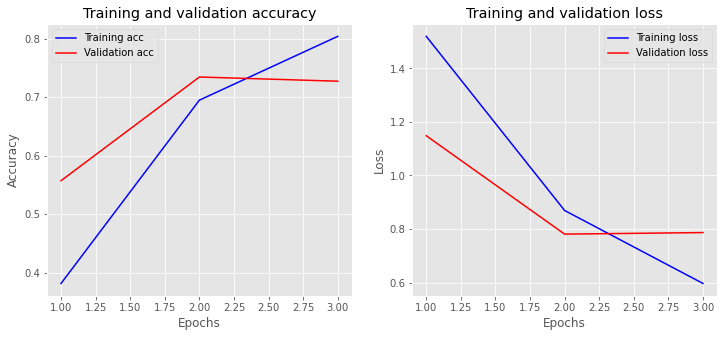

In [166]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    
plot_history(history)

In [162]:
# Here's how to generate a prediction on individual examples
#text_labels = encoder.classes_ 
id_to_category = {0:'politik', 1:'panorama', 2:'sport', 3:'wirtschaft',
           4:'netzwelt', 5:'wissenschaft', 6:'kultur'}

text ="technology,facebook apple technology startup,"
test_sequences = tok.texts_to_sequences(text)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
preds = model.predict(test_sequences_matrix)[0]

pred_classes = np.argsort(preds)[-3:][::-1]

classes = [id_to_category[i] for i in pred_classes]
props   = preds[pred_classes]

for c, p in zip(classes, props):
    print("{} {:.2f} %".format(c,p))

netzwelt 0.34 %
kultur 0.19 %
panorama 0.16 %
